In [1]:
train_file_path = "C:/Users/shabbir.hasan/Documents/Hasan/Anaconda_rep/Kaggle/whats-cooking/train.json"

In [2]:
import json

In [3]:
with open(train_file_path, encoding='utf-8') as data_file:
    data = json.loads(data_file.read())

In [4]:
len(data)

39774

In [5]:
data[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [6]:
data[1000]

{'id': 36837,
 'cuisine': 'italian',
 'ingredients': ['marinara sauce',
  'goat cheese',
  'minced garlic',
  'salt',
  'ground lamb',
  'roasted red peppers',
  'chopped onion',
  'black pepper',
  'refrigerated pizza dough',
  'italian seasoning']}

In [7]:
from pandas.io.json import json_normalize

In [8]:
json_normalize(data[0])

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."


In [9]:
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

In [10]:

json_normalize(flatten_json(data[1]))

,cuisine,id,ingredients_0,ingredients_1,ingredients_10,ingredients_2,ingredients_3,ingredients_4,ingredients_5,ingredients_6,ingredients_7,ingredients_8,ingredients_9
0,southern_us,25693,plain flour,ground pepper,vegetable oil,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk


In [11]:
import pandas as pd
pd.DataFrame(json_normalize(flatten_json(data[1:5])))

,0_cuisine,0_id,0_ingredients_0,0_ingredients_1,0_ingredients_10,0_ingredients_2,0_ingredients_3,0_ingredients_4,0_ingredients_5,0_ingredients_6,...,3_ingredients_18,3_ingredients_19,3_ingredients_2,3_ingredients_3,3_ingredients_4,3_ingredients_5,3_ingredients_6,3_ingredients_7,3_ingredients_8,3_ingredients_9
0,southern_us,25693,plain flour,ground pepper,vegetable oil,salt,tomatoes,ground black pepper,thyme,eggs,...,natural yogurt,bay leaf,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice


In [12]:
from pandas.io.json import json_normalize

In [13]:
df = json_normalize(data)

In [14]:
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [44]:
df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [15]:
df.ingredients.head()

0    [romaine lettuce, black olives, grape tomatoes...
1    [plain flour, ground pepper, salt, tomatoes, g...
2    [eggs, pepper, salt, mayonaise, cooking oil, g...
3                  [water, vegetable oil, wheat, salt]
4    [black pepper, shallots, cornflour, cayenne pe...
Name: ingredients, dtype: object

In [16]:
def sending_each_list_element_to_dic(df_one_element):
    for i in df_one_element:
        creating_dic_all_ingredients(i.upper())
#         print(i.upper())
        break

In [17]:
def creating_dic_all_ingredients(ingre):
    if ingre in ingredients_holder:
        ingredients_holder[ingre] = ingredients_holder[ingre] + 1
    else:
        ingredients_holder[ingre] = 1        

In [18]:
ingredients_holder = {}

df['ingredients'].apply(sending_each_list_element_to_dic)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
39744    None
39745    None
39746    None
39747    None
39748    None
39749    None
39750    None
39751    None
39752    None
39753    None
39754    None
39755    None
39756    None
39757    None
39758    None
39759    None
39760    None
39761    None
39762    None
39763    None
39764    None
39765    None
39766    None
39767    None
39768    None
39769    None
39770    None
39771    None
39772    None
39773    None
Name: ingredients, Length: 39774, dtype: object

In [19]:
ingredients_holder

{'ROMAINE LETTUCE': 69,
 'PLAIN FLOUR': 30,
 'EGGS': 944,
 'WATER': 1447,
 'BLACK PEPPER': 549,
 'OLIVE OIL': 1297,
 'SUGAR': 1590,
 'CHOPPED TOMATOES': 37,
 'PIMENTOS': 11,
 'LOW SODIUM SOY SAUCE': 102,
 'ITALIAN PARSLEY LEAVES': 10,
 'GROUND CINNAMON': 295,
 'FRESH PARMESAN CHEESE': 28,
 'TUMERIC': 159,
 'GREEK YOGURT': 3,
 'ITALIAN SEASONING': 3,
 'SOY SAUCE': 794,
 'PORK LOIN': 6,
 'ROMA TOMATOES': 17,
 'LOW-FAT MAYONNAISE': 2,
 'SESAME SEEDS': 93,
 'MARINARA SAUCE': 24,
 'HERBS': 9,
 'GROUND BLACK PEPPER': 629,
 'GREEN BELL PEPPER': 273,
 'FLOUR TORTILLAS': 118,
 'YELLOW CORN MEAL': 91,
 'CHICKEN BROTH': 401,
 'CHILI POWDER': 110,
 'GREEN ONIONS': 190,
 'COLLARD GREENS': 44,
 'OSCAR MAYER DELI FRESH SMOKED HAM': 1,
 'ICE CUBES': 37,
 'COOKED CHICKEN': 24,
 'SALMON FILLETS': 35,
 'TOMATOES': 731,
 'BUTTER': 330,
 'MAYONAISE': 205,
 'SIRLOIN': 7,
 'LARGE EGGS': 323,
 'FRESH BASIL': 270,
 'LEMON': 72,
 'BREAD CRUMBS': 72,
 'MELTED BUTTER': 82,
 'COARSE SALT': 45,
 'PIZZA CRUST': 11,


In [20]:
df_ingr = pd.DataFrame(list(ingredients_holder.items()), columns=['ingredient', 'counts'])


In [21]:
df_ingr.sort_values('counts', ascending=False)

,ingredient,counts
6,SUGAR,1590
3,WATER,1447
5,OLIVE OIL,1297
91,PEPPER,962
2,EGGS,944
16,SOY SAUCE,794
35,TOMATOES,731
103,KOSHER SALT,663
23,GROUND BLACK PEPPER,629
4,BLACK PEPPER,549


In [22]:
df_ingr.shape

(2718, 2)

In [23]:
df_ingr[df_ingr.ingredient=='SALT']

,ingredient,counts
70,SALT,390


In [24]:
df_ingr.ingredient[df_ingr.counts<5].shape

(1844,)

### FuZZyWuZZy

In [25]:
!pip install fuzzywuzzy

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
# fuzz is used to compare TWO strings
from fuzzywuzzy import fuzz

# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

C:\Users\shabbir.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [27]:
fuzz.ratio("this is a test", "this is a fun")

74

In [37]:
len(ingredients_holder)

2718

In [42]:
%%time
for count, i in enumerate(ingredients_holder):
    for j in ingredients_holder:
        if (fuzz.ratio(i,j) >87) and (fuzz.ratio(i,j) < 100):
            print(i, "---", j)
    if count==1000: break
            

LOW SODIUM SOY SAUCE --- LOWER SODIUM SOY SAUCE
LOW SODIUM SOY SAUCE --- LESS SODIUM SOY SAUCE
ITALIAN SEASONING --- ITALIAN SEASONING MIX
GREEN BELL PEPPER --- RED BELL PEPPER
CHILI POWDER --- CHILE POWDER
LEMONGRASS --- LEMON GRASS
BURGER BUNS --- HAMBURGER BUNS
CATFISH FILLETS --- FISH FILLETS
SHREDDED CHEDDAR CHEESE --- SHREDDED MILD CHEDDAR CHEESE
SHREDDED CHEDDAR CHEESE --- SHREDDED SHARP CHEDDAR CHEESE
CORN FLAKES CEREAL --- CORNFLAKE CEREAL
DICED TOMATOES --- SLICED TOMATOES
HOT RED PEPPER FLAKES --- RED PEPPER FLAKES
PHILADELPHIA CREAM CHEESE --- PHILADELPHIA LIGHT CREAM CHEESE
BONELESS SKINLESS CHICKEN BREASTS --- BONELESS SKINLESS CHICKEN BREAST HALVES
BONELESS SKINLESS CHICKEN BREASTS --- BONELESS, SKINLESS CHICKEN BREAST
UNSALTED BUTTER --- SALTED BUTTER
SELF RISING FLOUR --- SELF RAISING FLOUR
CHILI PASTE --- CHILLI PASTE
CHILI PASTE --- CHILE PASTE
SEASONED BREAD CRUMBS --- UNSEASONED BREADCRUMBS
CAULIFLOWER --- CAULIFLOWERETS
FIRMLY PACKED BROWN SUGAR --- FIRMLY PACKED 

In [347]:
import seaborn as sn

C:\Users\shabbir.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


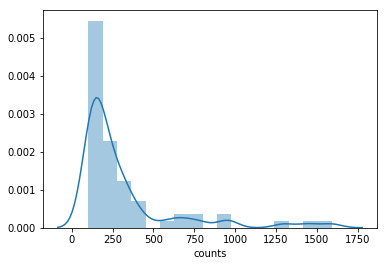

In [357]:
sn.distplot(df_ingr.counts[(df_ingr.counts>100)])